# Домашнее задание
* Прочитать про методы оптимизации для нейронных сетей https://habr.com/post/318970/
* Взять код градиентного спуска для линейной регрессии (с занятия) и обучить ее
    * Методом nesterov momentum
    * Методом rmsprop
* Задание со звездочкой - доработать код логистической регрессии из первого занятия и обучить ее теми же методами для задачи классификации Ирисов (взять только два цветка - Iris Versicolor и Iris Virginica)

In [11]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from jupyterthemes import jtplot
jtplot.style()

# Взять код градиентного спуска для линейной регрессии (с занятия) и обучить ее

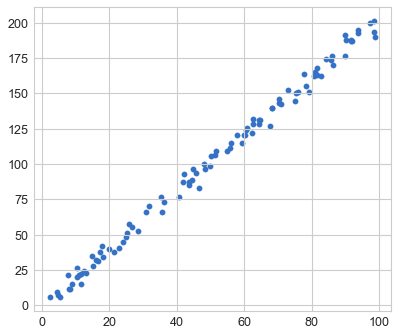

In [12]:
N = 100
X = np.random.uniform(low=0, high=100, size=N)
Y = 2*X + 1 + np.random.normal(scale=5, size=N)

plt.scatter(X, Y)
plt.show()

### Методом nesterov momentum

In [53]:
# h(xi) = params[0] + params[1] * xi

EPOCHS = 50
LEARNING_RATE = 0.0001

momentum = 0.9
velocity_param_0 = 0
velocity_param_1 = 0

costs = []
params = []
preds = []
params = np.random.normal(size=(2,))

for _ in range(EPOCHS):
    predictions = params[0] + params[1] * X
    preds.append(predictions)

    cost = np.sum(np.square(predictions - Y)) / (2 * len(predictions))
    costs.append(cost)

    predictions_ahead = ( params[0] - momentum * velocity_param_0 ) + ( params[1] - momentum * velocity_param_1 ) * X
    
    velocity_param_0 =  momentum * velocity_param_0 + LEARNING_RATE * np.sum(predictions_ahead - Y) / len(predictions_ahead)
    velocity_param_1 =  momentum * velocity_param_1 + LEARNING_RATE * np.sum((predictions_ahead - Y) * X) / len(predictions_ahead)
    
    params[0] -= velocity_param_0
    params[1] -= velocity_param_1 

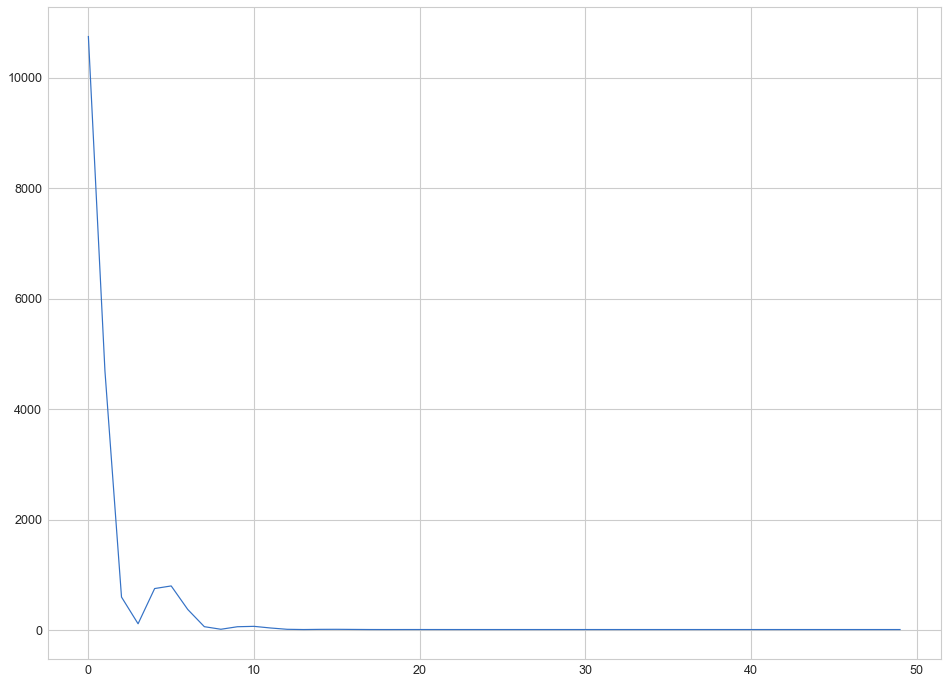

In [54]:
plt.figure(figsize=(16,12))
plt.plot(costs)
plt.show()

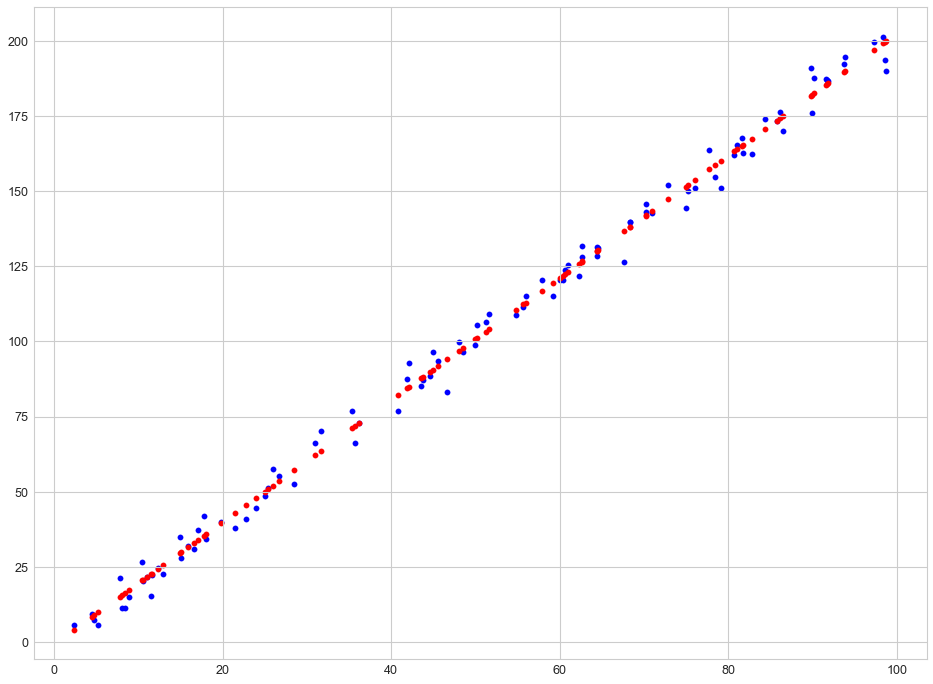

In [55]:
plt.figure(figsize=(16,12))
plt.scatter(X, Y, color='blue')
plt.scatter(X, preds[49], color='red')
plt.show()

In [16]:
params

array([-0.94354726,  2.01914242])

### Методом rmsprop

In [ ]:
# h(xi) = params[0] + params[1] * xi

EPOCHS = 12
LEARNING_RATE = 0.0001

costs = []
params = []
preds = []
params = np.random.normal(size=(2,))

for _ in range(EPOCHS):
    predictions = params[0] + params[1] * X
    preds.append(predictions)

    cost = np.sum(np.square(predictions - Y)) / (2 * len(predictions))
    costs.append(cost)
    
    params[0] -= LEARNING_RATE * np.sum(predictions - Y) / len(predictions)
    params[1] -= LEARNING_RATE * np.sum((predictions - Y) * X) / len(predictions)  

In [ ]:
plt.figure(figsize=(16,12))
plt.plot(costs)
plt.show()

In [ ]:
plt.figure(figsize=(16,12))
plt.scatter(X, Y, color='blue')
plt.scatter(X, preds[10], color='red')
plt.show()

In [ ]:
params

# Задание со звездочкой - доработать код логистической регрессии из первого занятия и обучить ее теми же методами для задачи классификации Ирисов (взять только два цветка - Iris Versicolor и Iris Virginica)